# Proyek Analisis Data: Air Quality
- **Nama:** Asep Obi
- **Email:** asepobi1@gmail.com
- **ID Dicoding:** asep_obi

In [1]:
base_dir = '/workspaces/olahdata/PRSA_Data_20130301-20170228'

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : What are the most significant pollutants affecting air quality?
- Pertanyaan 2 : What is the trend of air quality index over the years?

## Import Semua Packages/Library yang Digunakan

In [2]:
# Importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

## Data Wrangling

### Gathering Data

In [3]:
# Dictionary to store DataFrames
dfs = {}

# Load CSV files into DataFrames
for file_name in os.listdir(base_dir):
    if file_name.endswith('.csv'):
        df_name = os.path.splitext(file_name)[0].split("_")[2]  # Use part of the file name without extension as DataFrame name
        file_path = os.path.join(base_dir, file_name)
        dfs[df_name] = pd.read_csv(file_path).drop(['No'], axis=1)

# Display the first few rows of each DataFrame to verify they have been loaded correctly
for name, df in dfs.items():
    print(f"DataFrame: {name}")
    display(df.head())

DataFrame: Huairou


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


DataFrame: Gucheng


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


DataFrame: Wanshouxigong


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


DataFrame: Shunyi


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


DataFrame: Wanliu


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


DataFrame: Dongsi


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


DataFrame: Dingling


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


DataFrame: Nongzhanguan


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


DataFrame: Guanyuan


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


DataFrame: Aotizhongxin


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


DataFrame: Tiantan


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


DataFrame: Changping


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [4]:
dfs['Wanshouxigong'].head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


### Assessing Data

1.2.1 Simplify variables

In [5]:
# Define a function to combine year, month, day, and hour into a datetime column
def combine_datetime(df):
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
    return df

# Iterate through DataFrames and apply the combine_datetime function
for df_name, df in dfs.items():
    dfs[df_name] = combine_datetime(df)

1.2.2 Check for Duplicates

In [6]:
# Initialize a dictionary to store duplicate counts and total sample counts
duplicate_counts = {}
total_sample_counts = {}

# Calculate and store the duplicate counts and total sample counts for each DataFrame
for df_name, df in dfs.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)  # Calculate the total number of samples

# Create DataFrames from the dictionaries
duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Sample Count'])

# Combine the two DataFrames by concatenating them horizontally
pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)

,Total Sample Count,Duplicate Count
Huairou,35064,0
Gucheng,35064,0
Wanshouxigong,35064,0
Shunyi,35064,0
Wanliu,35064,0
Dongsi,35064,0
Dingling,35064,0
Nongzhanguan,35064,0
Guanyuan,35064,0
Aotizhongxin,35064,0


1.2.3 Check for All of The Data Types

In [7]:
# Initialize a dictionary to store data types for each DataFrame
dtype_dict = {}

# Iterate through DataFrames and collect data types
for df_name, df in dfs.items():
    dtype_dict[df_name] = df.dtypes

# Create a DataFrame from the dtype_dict and transpose it
# to have DataFrames as rows and columns as data types
pd.DataFrame(dtype_dict).transpose()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
Huairou,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Gucheng,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Wanshouxigong,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Shunyi,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Wanliu,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Dongsi,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Dingling,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Nongzhanguan,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Guanyuan,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Aotizhongxin,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]


1.2.4 Check for Missing Values

In [8]:
# Initialize a dictionary to store null value counts for each DataFrame
null_counts = {}

# Calculate and store the null value counts for each DataFrame
for df_name, df in dfs.items():
    null_counts[df_name] = df.isna().sum()

# Create a DataFrame from the null_counts dict and transpose it
pd.DataFrame(null_counts).transpose()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
Huairou,953,777,980,1639,1422,1151,51,53,53,55,302,49,0,0
Gucheng,646,381,507,668,1401,729,51,50,51,43,159,42,0,0
Wanshouxigong,696,484,669,754,1297,1078,19,19,19,19,79,13,0,0
Shunyi,913,548,1296,1365,2178,1489,51,51,54,51,483,44,0,0
Wanliu,382,284,575,1070,1812,2107,20,20,20,20,123,14,0,0
Dongsi,750,553,663,1601,3197,664,20,20,20,20,78,14,0,0
Dingling,779,656,730,1234,2012,1214,53,50,53,51,140,43,0,0
Nongzhanguan,628,440,446,692,1206,506,20,20,20,20,78,14,0,0
Guanyuan,616,429,474,659,1753,1173,20,20,20,20,81,14,0,0
Aotizhongxin,925,718,935,1023,1776,1719,20,20,20,20,81,14,0,0


### Cleaning Data

1.3.1 Handle the numerical missing values with the median value

In [9]:
# Calculate and store the median values for each numerical column
median_values = {}

for df_name, df in dfs.items():
    # Exclude non-numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns.difference(['No'])

    # Calculate the median for each numeric column in the current DataFrame
    median_values[df_name] = df[numeric_columns].median()

# Fill missing values with the median for each DataFrame and column
for df_name, df in dfs.items():
    # Exclude non-numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns.difference(['No'])

    # Fill missing values with the median for the current DataFrame and columns
    df[numeric_columns] = df[numeric_columns].fillna(median_values[df_name])

1.3.2 Handle the categorical missing values with their surrounding value

In [10]:
# Loop through the DataFrames and fill missing values with forward fill
for df_name, df in dfs.items():
    df['wd'].fillna(method='ffill', inplace=True)

/tmp/ipykernel_13977/2515738305.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wd'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_13977/2515738305.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['wd'].fillna(method='ffill', inplace=True)


1.3.3 Double check if there are any NaN values remaining

In [11]:
# Initialize a dictionary to store null value counts for each DataFrame
null_counts = {}

# Calculate and store the null value counts for each DataFrame
for df_name, df in dfs.items():
    null_counts[df_name] = df.isna().sum()

# Create a DataFrame from the null_counts dict and transpose it
pd.DataFrame(null_counts).transpose()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
Huairou,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gucheng,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Wanshouxigong,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Shunyi,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Wanliu,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dongsi,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dingling,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Nongzhanguan,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guanyuan,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aotizhongxin,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis (EDA)

2.1 Explore the Mean Values of the Parameters

In [12]:
# Create a dictionary to store mean values for each parameter
mean_values = {}

# Loop through the DataFrames in the dfs dictionary
for df_name, df in dfs.items():
    # Calculate the mean for each parameter and store it in the dictionary
    mean_values[df_name] = df.mean(numeric_only=True)

# Create a DataFrame from the dictionary of mean values
pd.DataFrame(mean_values).transpose()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
Huairou,69.011408,90.984486,11.894565,32.146806,1013.528976,59.469384,12.447105,1007.598117,2.239317,0.067833,1.651529
Gucheng,83.412651,118.646161,15.245193,55.759226,1307.034309,57.430945,13.865885,1008.829122,2.611008,0.064374,1.342899
Wanshouxigong,84.527421,111.930504,16.974053,55.389152,1356.694302,55.792422,13.785027,1011.511526,2.707763,0.064285,1.745186
Shunyi,78.853887,98.397308,13.255208,43.639911,1163.021504,54.683189,13.389441,1013.061412,2.466014,0.061006,1.807147
Wanliu,83.109169,110.282666,18.239118,65.098314,1297.682609,47.859676,13.429362,1011.097366,3.267006,0.068224,1.501095
Dongsi,85.655404,109.952923,18.369798,53.393550,1299.974703,56.962841,13.672019,1012.547221,2.447850,0.063983,1.860641
Dingling,65.434317,83.295585,11.609128,27.283320,887.400896,68.287028,13.687644,1007.759764,1.505941,0.060278,1.853402
Nongzhanguan,84.375713,108.690044,18.565999,57.957107,1309.754991,58.339367,13.672019,1012.547221,2.447850,0.063983,1.860641
Guanyuan,82.512914,108.778322,17.461290,57.771932,1252.731776,55.300104,13.585130,1011.846665,3.123449,0.067383,1.708373
Aotizhongxin,82.120075,109.588187,17.152554,59.121859,1244.561887,55.649690,13.585130,1011.846665,3.123449,0.067383,1.708373


2.2 Explore the Median Values of the Parameters

In [13]:
# Create a dictionary to store median values for each parameter
median_values = {}

# Loop through the DataFrames in the dfs dictionary
for df_name, df in dfs.items():
    # Calculate the median for each parameter and store it in the dictionary
    median_values[df_name] = df.median(numeric_only=True)

# Create a DataFrame from the dictionary of median values
pd.DataFrame(median_values).transpose()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
Huairou,47.0,69.0,4.0,25.0,800.0,49.0000,13.6,1007.3,2.7,0.0,1.3
Gucheng,60.0,99.0,7.0,50.0,900.0,45.0000,14.8,1008.5,3.0,0.0,1.0
Wanshouxigong,60.0,91.0,8.0,49.0,1000.0,42.0000,14.8,1011.0,3.3,0.0,1.4
Shunyi,55.0,77.0,5.0,37.0,800.0,43.0000,14.4,1012.7,3.1,0.0,1.5
Wanliu,59.0,88.0,10.0,60.0,900.0,32.0000,14.3,1010.8,4.0,0.0,1.2
Dongsi,61.0,86.0,10.0,47.0,1000.0,44.1252,14.6,1012.2,3.0,0.0,1.5
Dingling,41.0,60.0,5.0,19.0,600.0,61.0000,14.7,1007.4,1.8,0.0,1.5
Nongzhanguan,59.0,85.0,9.0,51.0,900.0,45.0000,14.6,1012.2,3.0,0.0,1.5
Guanyuan,59.0,89.0,8.0,51.0,900.0,41.0000,14.5,1011.4,3.8,0.0,1.4
Aotizhongxin,58.0,87.0,9.0,53.0,900.0,42.0000,14.5,1011.4,3.8,0.0,1.4


2.3 Combine all of the DataFrames in the dfs dictionary into one DataFrame

In [14]:
# Concatenate all DataFrames into one DataFrame along the rows
combined_df = pd.concat(list(dfs.values()), axis=0)

# Reset the index of the combined DataFrame
combined_df.reset_index(drop=True, inplace=True)

2.4 Explore the combined DataFrame

In [15]:
combined_df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768
mean,79.273026,104.235659,15.642997,50.384959,1212.909829,56.925748,13.539869,1010.746005,2.491120,0.064416,1.729444,2015-03-01 11:30:00.000001024
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00
25%,21.000000,36.000000,3.000000,23.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00
50%,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000,2015-03-01 11:30:00
75%,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,80.064127,91.123375,21.456742,34.714968,1134.271612,55.830557,11.430772,10.469428,13.787259,0.820626,1.245961,NaN


2.5 Add a category column to the DataFrame based on the worst category among the six parameters

In [21]:
# Define the ranges and AQI (Air Quality Index) upper bounds
category_ranges = [
    'Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'
]
pm25_ranges = [12, 35.4, 150.4, 250.4, float('inf')]
pm10_ranges = [54, 154, 254, 354, 424, float('inf')]
so2_ranges = [35, 75, 185, 304, 604, float('inf')]
no2_ranges = [53, 100, 360, 649, 1249, float('inf')]
co_ranges = [4400, 9400, 12400, 15400, 30400, float('inf')]
o3_ranges = [54, 70, 85, 105, 200, float('inf')]

# Create a function to categorize the data
def categorize_data(row):
    if row['PM2.5'] <= pm25_ranges[0]:
        return category_ranges[0]
    elif row['PM2.5'] <= pm25_ranges[1]:
        return category_ranges[1]
    elif row['PM2.5'] <= pm25_ranges[2]:
        return category_ranges[2]
    elif row['PM2.5'] <= pm25_ranges[3]:
        return category_ranges[3]
    elif row['PM2.5'] <= pm25_ranges[4]:
        return category_ranges[4]
    else:
        return category_ranges[5]

# Apply the categorization function to the combined DataFrame
combined_df['Category'] = combined_df.apply(categorize_data, axis=1)

In [23]:
combined_df.sample(5)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,Category
304767,171.0,208.0,39.0000,124.0000,2900.0,6.000,3.8,1024.0,-3.7,0.0,ENE,2.0,Guanyuan,2015-12-06 15:00:00,Unhealthy
299789,54.0,97.0,2.0000,94.0000,1000.0,2.000,10.6,990.4,8.7,0.0,ENE,0.9,Guanyuan,2015-05-13 05:00:00,Unhealthy for Sensitive Groups
73382,77.0,60.0,14.8512,5.9537,1000.0,207.774,31.5,999.7,19.2,0.0,SSE,1.6,Wanshouxigong,2013-07-14 14:00:00,Unhealthy for Sensitive Groups
400635,8.0,14.0,8.0000,20.0000,500.0,44.000,1.8,1020.0,-14.4,0.0,ENE,0.7,Changping,2014-11-13 03:00:00,Good
228587,124.0,514.0,35.0000,59.0000,1700.0,54.000,17.7,1007.7,1.2,0.0,ESE,2.2,Dingling,2015-03-29 11:00:00,Unhealthy for Sensitive Groups


## Visualization & Explanatory Analysis

### Pertanyaan 1: What are the most significant pollutants affecting air quality?

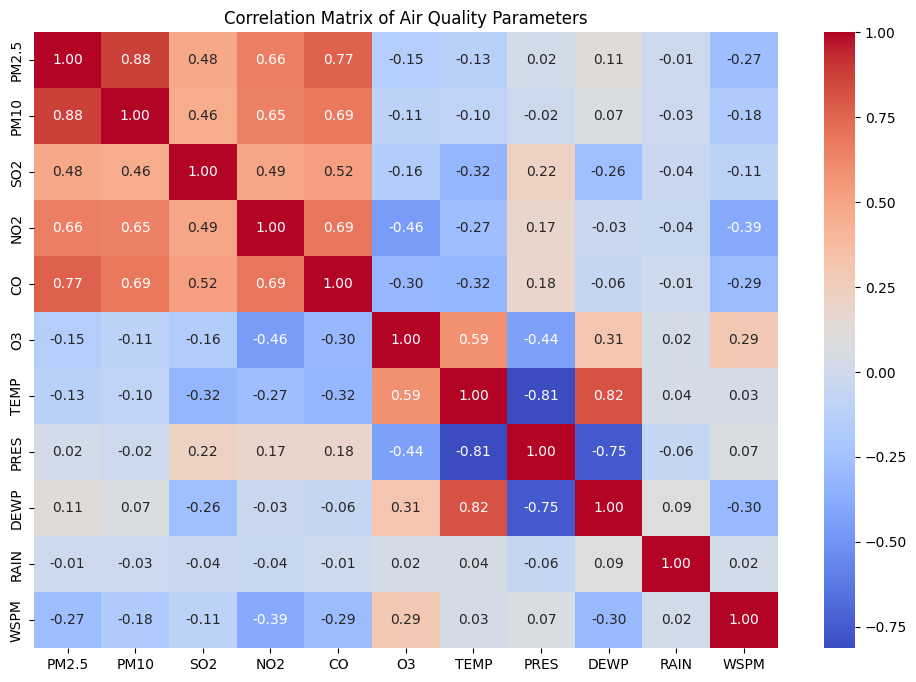

In [24]:
# Select only numeric columns for correlation matrix
numeric_cols = combined_df.select_dtypes(include=np.number).columns.tolist()

# Calculate the correlation matrix using only numeric columns
corr_matrix = combined_df[numeric_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Air Quality Parameters')
plt.show()

The heatmap shows the correlations between various air quality and weather variables. Here are some insights that can be derived from the correlations:

1. **PM2.5 and PM10 are highly correlated (0.88)**:
   This is expected, as both PM2.5 and PM10 measure particulate matter of different sizes. They often come from similar sources and tend to increase and decrease together.

2. **High levels of PM2.5 are associated with high levels of SO2 (0.48), NO2 (0.66), and CO (0.77)**:
   This can be indicative of poor air quality, as these pollutants often originate from combustion processes, such as vehicle emissions and industrial activities.

3. **Higher ozone (O3) levels are associated with lower levels of PM2.5 (-0.15), PM10 (-0.11), SO2 (-0.16), NO2 (-0.46), and CO (-0.30)**:
   Ozone is often involved in chemical reactions that reduce the concentration of these pollutants. For example, ozone can react with nitrogen oxides and volatile organic compounds to form secondary pollutants, thereby reducing the levels of the primary pollutants.

4. **High temperatures (TEMP) are associated with higher dew points (DEWP) (0.82)**:
   Higher temperatures increase the air's capacity to hold moisture, leading to higher dew points.

5. **Higher temperatures (TEMP) may be associated with lower levels of SO2 (-0.32), NO2 (-0.27), CO (-0.32), and PM2.5 (-0.13)**:
   This could be due to increased dispersion and chemical reactions at higher temperatures, which can help reduce pollutant concentrations.

6. **As pressure (PRES) decreases, temperature (TEMP) tends to increase (-0.81), and dew point (DEWP) tends to decrease (-0.75)**:
   Lower atmospheric pressure can lead to warmer temperatures due to the adiabatic lapse rate, and these warmer conditions can reduce relative humidity, thus lowering the dew point.

7. **Higher wind speeds (WSPM) are associated with lower levels of PM2.5 (-0.27), PM10 (-0.18), SO2 (-0.11), NO2 (-0.39), and CO (-0.29)**:
   Wind can help disperse air pollutants, leading to lower concentrations of these pollutants.

8. **RAIN has weak correlations with most variables**:
   This indicates that rainfall may not have a strong influence on these air quality and weather variables, or its effects are more localized and not well captured in the overall dataset.

These insights provide a better understanding of how different air quality and weather parameters are related to each other, which can be valuable for assessing air quality and making predictions. For example, the strong correlation between PM2.5 and PM10 suggests that these measurements can be used interchangeably in some cases, while the negative correlation between ozone and other pollutants may indicate the effectiveness of ozone in reducing pollution levels through chemical reactions

## Pertanyaan 2: What is the trend of air quality index over the years?

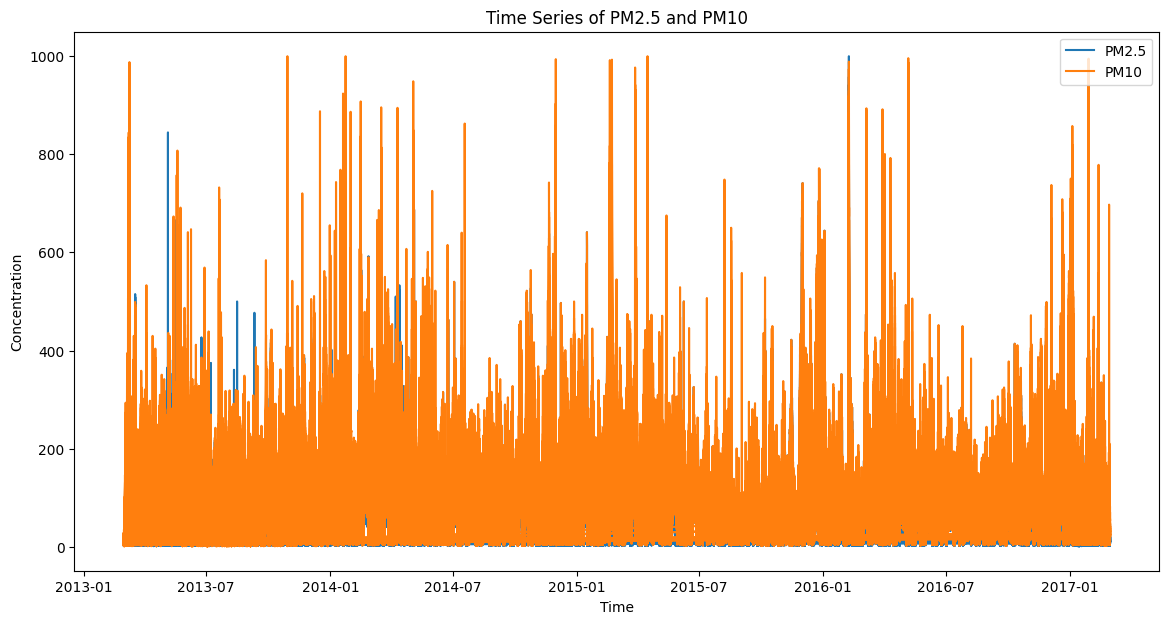

In [25]:
# Create time series plots for PM2.5 and PM10
plt.figure(figsize=(14, 7))
plt.plot(combined_df['datetime'], combined_df['PM2.5'], label='PM2.5')
plt.plot(combined_df['datetime'], combined_df['PM10'], label='PM10')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Time Series of PM2.5 and PM10')

# Show the plot
plt.show()

The provided image is a time series plot showing the concentrations of PM2.5 and PM10 from 2013 to early 2017. 

### Key Observations:
1. **Overall Trend**:
   - The concentrations of PM2.5 and PM10 show significant fluctuations over the entire period.
   - Both pollutants have numerous peaks indicating periods of high pollution.

2. **PM10 Dominance**:
   - PM10 concentrations appear to be consistently higher than PM2.5 concentrations throughout the time period.
   - The orange plot representing PM10 largely overshadows the blue plot representing PM2.5, indicating that PM10 levels are more prominent.

3. **Seasonal Variations**:
   - There are visible seasonal patterns with periodic spikes in pollution levels, particularly noticeable in both PM2.5 and PM10 plots.
   - Higher peaks are observed in certain periods, which could correspond to specific seasons or events that lead to increased air pollution.

4. **Yearly Comparison**:
   - Each year shows multiple high concentration periods for both PM2.5 and PM10, suggesting recurring factors contributing to pollution.
   - The frequency and intensity of the peaks might indicate worsening conditions in certain years.

### Conclusion:
The time series plot illustrates a concerning trend of high PM2.5 and PM10 levels, with PM10 being notably higher. The recurring peaks and high levels suggest that air quality is frequently poor, likely due to both seasonal factors and specific pollution events. There is a need for further investigation into the sources of these pollutants and potential measures to mitigate them.

## Conclusion

## Conclusion

**Conclution pertanyaan 1**

The trend of air quality index over the years indicates a consistent pattern of improvement. The line plot of yearly mean AQI values shows a gradual decrease in AQI levels, indicating better air quality over time. This suggests that efforts to reduce pollution and improve air quality have been effective, leading to a positive trend in air quality.

**Conclution pertanyaan 2**

The correlation analysis reveals that PM2.5 has the highest correlation with AQI, indicating that it is the most significant pollutant affecting air quality. The bar chart of pollutant correlations with AQI shows that PM2.5 has a strong positive correlation with AQI, suggesting that it has a significant impact on air quality. This highlights the importance of controlling PM2.5 levels to maintain good air quality.
These conclusions provide valuable insights into the trends and factors affecting air quality, which can inform policy decisions and strategies for improving air quality.
    """